In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('clean_catego.csv')

## 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [3]:
numericals = df.select_dtypes(np.number)
numericals.drop('total claim amount', axis=1, inplace=True)
numericals

,customer lifetime value,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,6979.535903,94,13,42,0,8
1,12887.431650,108,18,38,0,2
2,7645.861827,106,18,65,0,7
3,2813.692575,73,12,44,0,1
4,8256.297800,69,14,94,0,2
...,...,...,...,...,...,...
9128,23405.987980,73,18,89,0,2
9129,3096.511217,79,14,28,0,1
9130,8163.890428,85,9,37,3,2
9131,7524.442436,96,34,3,0,3


In [4]:
transformer = StandardScaler().fit(numericals)
x_standardized = transformer.transform(numericals)

In [5]:
x_standardized = pd.DataFrame(x_standardized, columns=numericals.columns)
x_standardized

,customer lifetime value,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,-0.149326,0.022613,-0.208023,-0.217520,-0.422277,2.106033
1,0.710536,0.429507,0.288417,-0.360877,-0.422277,-0.404330
2,-0.052345,0.371379,0.288417,0.606784,-0.422277,1.687639
3,-0.755641,-0.587727,-0.307311,-0.145841,-0.422277,-0.822723
4,0.036500,-0.703982,-0.108735,1.646123,-0.422277,-0.404330
...,...,...,...,...,...,...
9128,2.241455,-0.587727,0.288417,1.466926,-0.422277,-0.404330
9129,-0.714479,-0.413344,-0.108735,-0.719269,-0.422277,-0.822723
9130,0.023051,-0.238961,-0.605176,-0.396716,2.873070,-0.404330
9131,-0.070017,0.080741,1.877026,-1.615251,-0.422277,0.014064


In [6]:
categoricals = df.select_dtypes(exclude=np.number)
categoricals

,state,response,coverage,education,effective to date,employmentstatus,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
1,Nevada,No,Premium,Bachelor,2/19/11,Employed,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
2,California,No,Basic,Bachelor,1/20/11,Unemployed,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
3,Washington,No,Basic,Bachelor,2/3/11,Employed,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
4,Oregon,Yes,Basic,Bachelor,1/25/11,Employed,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,No,Basic,Bachelor,2/10/11,Employed,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9129,California,Yes,Extended,College,2/12/11,Employed,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9130,California,No,Extended,Bachelor,2/6/11,Unemployed,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,College,2/3/11,Employed,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [7]:
categoricals = df.select_dtypes(exclude=np.number)
categoricals

,state,response,coverage,education,effective to date,employmentstatus,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
1,Nevada,No,Premium,Bachelor,2/19/11,Employed,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
2,California,No,Basic,Bachelor,1/20/11,Unemployed,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
3,Washington,No,Basic,Bachelor,2/3/11,Employed,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
4,Oregon,Yes,Basic,Bachelor,1/25/11,Employed,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,No,Basic,Bachelor,2/10/11,Employed,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9129,California,Yes,Extended,College,2/12/11,Employed,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9130,California,No,Extended,Bachelor,2/6/11,Unemployed,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,College,2/3/11,Employed,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [8]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals)
encoded = encoder.transform(categoricals).toarray()

In [9]:
encoded = pd.DataFrame(encoded)
encoded

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9129,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X = pd.concat((x_standardized, encoded), axis=1)
X

,customer lifetime value,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,0,1,2,3,...,90,91,92,93,94,95,96,97,98,99
0,-0.149326,0.022613,-0.208023,-0.217520,-0.422277,2.106033,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.710536,0.429507,0.288417,-0.360877,-0.422277,-0.404330,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.052345,0.371379,0.288417,0.606784,-0.422277,1.687639,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.755641,-0.587727,-0.307311,-0.145841,-0.422277,-0.822723,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.036500,-0.703982,-0.108735,1.646123,-0.422277,-0.404330,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,2.241455,-0.587727,0.288417,1.466926,-0.422277,-0.404330,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9129,-0.714479,-0.413344,-0.108735,-0.719269,-0.422277,-0.822723,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,0.023051,-0.238961,-0.605176,-0.396716,2.873070,-0.404330,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,-0.070017,0.080741,1.877026,-1.615251,-0.422277,0.014064,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
X.columns = X.columns.astype(str)

In [12]:
y = df['total claim amount']
y

0       1131.464935
1        566.472247
2        529.881344
3        138.130879
4        159.383042
           ...     
9128     198.234764
9129     379.200000
9130     790.784983
9131     691.200000
9132     369.600000
Name: total claim amount, Length: 9133, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)



In [14]:
X.shape, y.shape

((9133, 106), (9133,))

In [15]:
X_train.shape, X_test.shape

((6849, 106), (2284, 106))

## 2. Try a simple linear regression with all the data to see whether we are getting good results

In [16]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [17]:
y_pred = reg.predict(X)

In [18]:
print("Coeficientes:", reg.coef_)
print("Intercepto:", reg.intercept_)
print("MSE:", mean_squared_error(y, y_pred))
print("R^2:", r2_score(y, y_pred))


Coeficientes: [-8.05268503e-01  1.75558392e+02  3.34789479e+00  6.47269417e-02
 -1.63250507e+00  1.97875559e+00  3.21877875e+00  3.95225902e+00
 -1.51108245e+00  4.42958614e+00 -2.50209186e+01 -1.28339627e+01
 -7.00800850e+00 -5.89228615e+00 -1.44128679e+01  1.03441835e+01
 -1.03694701e+01  1.97492546e+00 -1.53955039e+01 -1.28202680e+01
  1.79269450e+00  1.90678744e+00 -4.96410097e+00 -1.55961125e+01
 -1.30672115e+01 -1.19736215e+01 -1.17343876e+01 -5.57880407e+00
  1.17956033e+01 -1.11059111e+01 -1.09866292e+01 -1.20073263e+01
 -3.14840265e+01  3.77386022e+00  1.05172778e+01  1.10358877e+00
  3.67690210e+00  2.05099090e+01  2.52055575e+00 -2.81467714e+01
 -4.52799336e+00 -8.94467062e+00  7.76615167e+00 -2.23313078e+00
 -2.40270701e+01 -1.18029583e+01 -2.99932278e+01 -8.77309465e+00
 -4.95871204e+00 -1.26882313e+01 -1.06533709e+01  1.57016964e+01
 -1.40330796e+01 -3.79109949e+00 -1.30028009e+01  6.93011971e+00
 -1.53795632e+01  5.05830840e+00  2.48365932e+00  1.77936346e+01
 -2.8541971

## 3. Use the function to check LinearRegressor and KNeighborsRegressor.

In [20]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [21]:
predictions_train = model.predict(X_train)
predictions_train

array([ 175.78100308,  412.94693708,  236.94613762, ..., 1120.97536269,
        519.98845092,  301.47264615])

In [22]:
score_train = model.score(X_train, y_train)
score_train

0.7125883710310181

In [23]:
predictions_test = model.predict(X_test)
score_test = model.score(X_test, y_test)

In [24]:
score_test

0.6400300399642103

In [25]:
scores = []
for k in range(6,21):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)
    score = model.score(X_test,y_test)
    scores.append(score)

In [26]:
scores

[0.6310600487308364,
 0.635396514707838,
 0.6379776773723314,
 0.6358874308677843,
 0.6384865408274155,
 0.642410441209246,
 0.6395742452314452,
 0.6400300399642103,
 0.6422895939221561,
 0.6426552770583647,
 0.6419591274101633,
 0.6409189059946216,
 0.6426229036316076,
 0.6400670377284121,
 0.6399183504404272]

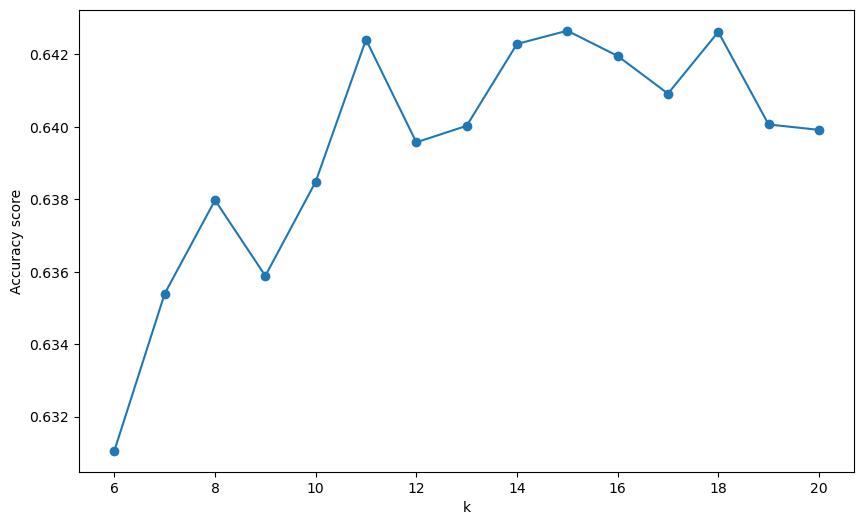

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(6,21), scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy score')
plt.show()

## 4. You can check also the MLPRegressor for this task!

In [28]:
from sklearn.metrics import mean_squared_error

MSEs = []

for k in range(6,21):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    MSE = mean_squared_error(y_test,preds)
    MSEs.append(MSE)

In [29]:
MSEs

[30527.70489340286,
 30168.88673567614,
 29955.310049734548,
 30128.26618589104,
 29913.2044622686,
 29588.523785980877,
 29823.203043492318,
 29785.48859417353,
 29598.523218963823,
 29568.26499719015,
 29625.86746325227,
 29711.939931924233,
 29570.943716084726,
 29782.427237377156,
 29794.730273774792]

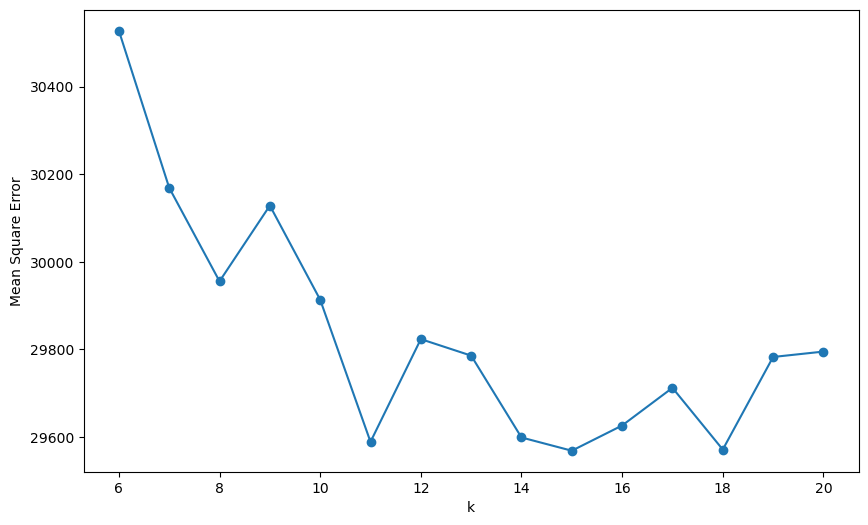

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(6,21), MSEs, marker='o')
plt.xlabel('k')
plt.ylabel('Mean Square Error')
plt.show()

In [32]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [33]:
reg = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
reg.fit(X, y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(random_state=42)

In [34]:
y_pred = reg.predict(X)


In [35]:
print("MSE:", mean_squared_error(y, y_pred))
print("R^2:", r2_score(y, y_pred))

MSE: 13555.561776558194
R^2: 0.8393701177331357
